In [28]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("../")
from src import soporte_encoding as se


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

from category_encoders import TargetEncoder

In [29]:
df = pd.read_csv("../datos/output/df_sin_nulos_min_max_iterative.csv", index_col=0)
df.head()

,price,propertyType,operation,size,exterior,rooms,bathrooms,province,municipality,distance,status,newDevelopment,floor,district,hasLift,parkingSpace,size_MinMax,distance_MinMax,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000,outliers_lof_0.01_20,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_20,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_20,outliers_lof_0.1_35,outliers_lof_0.1_50
0,750.0,flat,rent,60.0,True,1,1,Madrid,Madrid,7037.0,good,False,3,Hortaleza,True,desconocido,0.215054,0.121497,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,750.0,flat,rent,70.0,True,2,1,Madrid,San Sebastián de los Reyes,16145.0,good,False,bj,Centro Urbano,False,desconocido,0.268817,0.282949,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,400.0,penthouse,rent,67.0,True,2,2,Madrid,Villamanrique de Tajo,55041.0,good,False,2,desconocido,False,desconocido,0.252688,0.972435,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
3,590.0,flat,rent,70.0,True,3,2,Madrid,Rascafría,56596.0,good,False,desconocido,desconocido,False,desconocido,0.268817,1.000000,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,684.0,studio,rent,45.0,True,0,1,Madrid,Madrid,10656.0,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,0.134409,0.185649,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0


In [30]:
df["rooms"]=df["rooms"].astype("O")
df["bathrooms"]=df["bathrooms"].astype("O")
df["exterior"]=df["exterior"].astype("O")

In [31]:
df_categoricas=df.select_dtypes("O").drop(columns=["parkingSpace", "municipality", "district"])

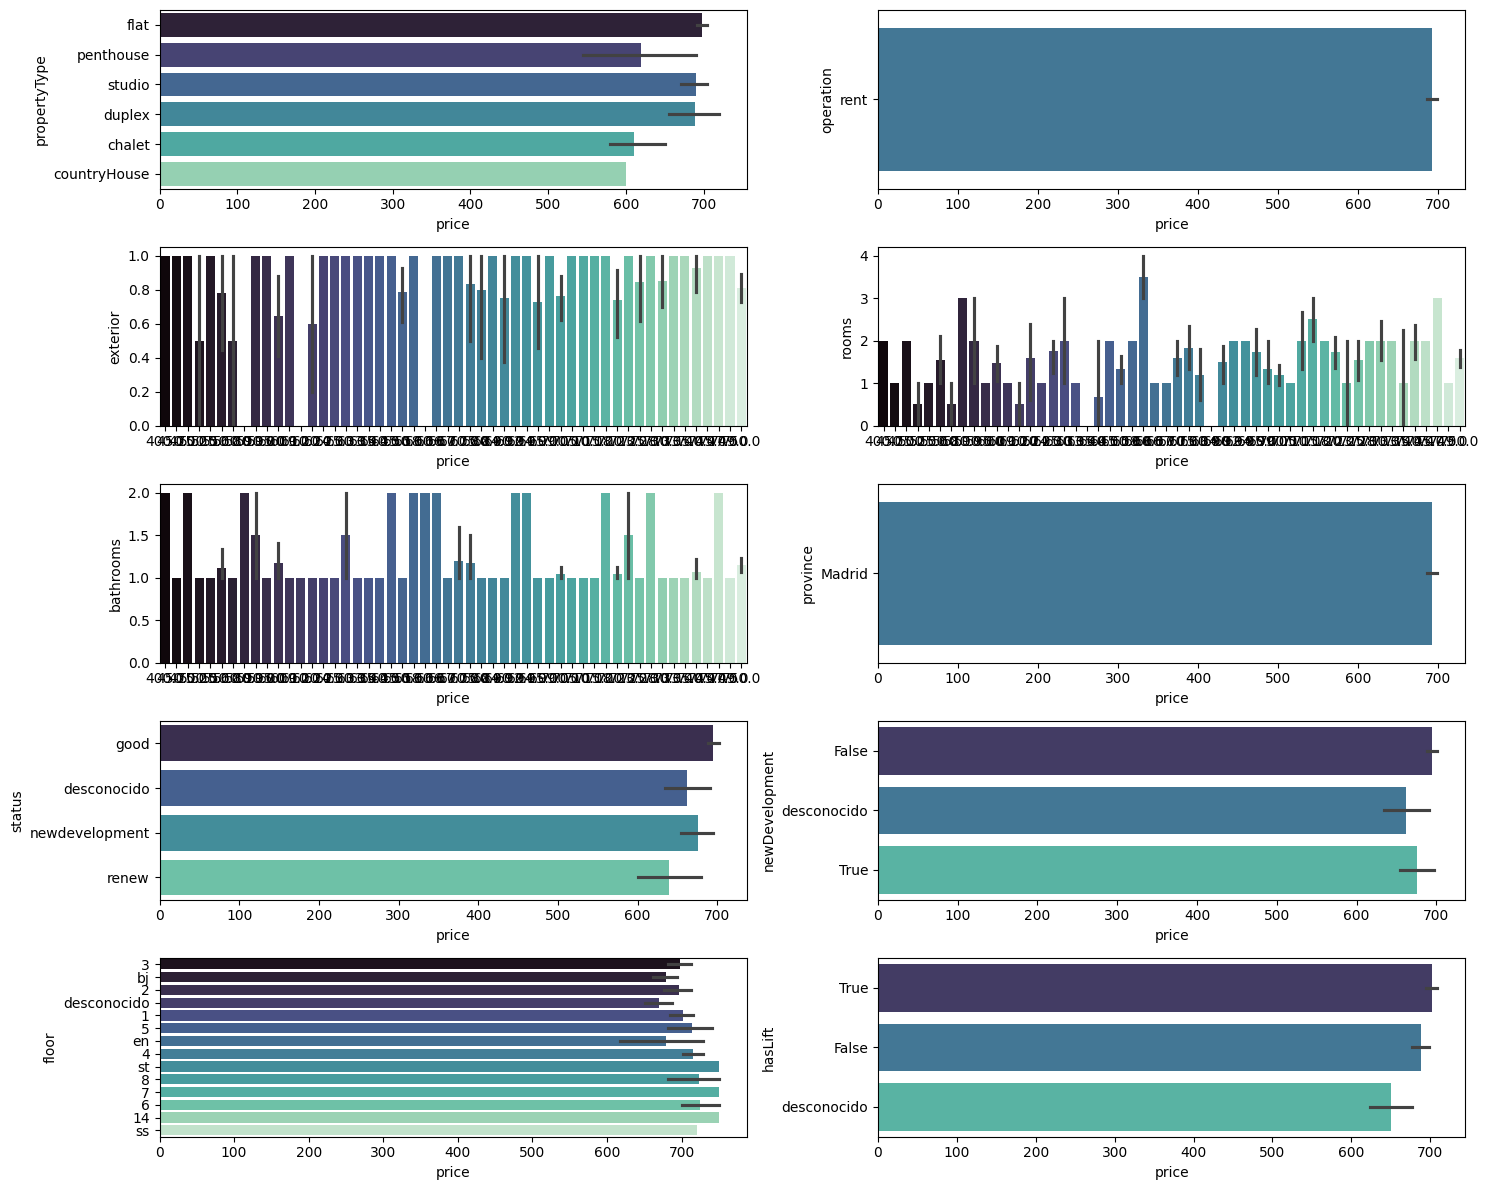

In [32]:
se.Analisis_Visual_Encoding(df, df_categoricas.columns, "price").subplot_cat()

In [33]:
df.select_dtypes("O").columns

Index(['propertyType', 'operation', 'exterior', 'rooms', 'bathrooms',
       'province', 'municipality', 'status', 'newDevelopment', 'floor',
       'district', 'hasLift', 'parkingSpace'],
      dtype='object')

In [34]:
df["operation"].unique()

array(['rent'], dtype=object)

In [35]:
df.drop(columns="operation", inplace=True)

In [36]:
df.select_dtypes("O").columns

Index(['propertyType', 'exterior', 'rooms', 'bathrooms', 'province',
       'municipality', 'status', 'newDevelopment', 'floor', 'district',
       'hasLift', 'parkingSpace'],
      dtype='object')

In [37]:
asunciones = se.Asunciones(df, "price")
print("\n-------------\n")
lista_col_categ=df.select_dtypes("O").drop(columns=["rooms"])

for categoria in lista_col_categ:

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov")

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # llamamos la clase de test estadísticos para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 10.491276765664804
Valor p: 0.062453362538402654
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
12,-77.6596,0.0009,-132.6632,-22.6560,flat-penthouse
14,69.7250,0.0110,10.3254,129.1246,penthouse-studio



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: [True, False]

Realizando test de Kruskal...
Estadístico de prueba: 1.7845538116842419
Valor p: 0.1815911373807056
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('bool'), dtype('<U1')) -> None

In [38]:
encoder_oh = OneHotEncoder()
transform_oh = encoder_oh.fit_transform(df[["price"]])
df_oh = pd.DataFrame(transform_oh.toarray(), columns=encoder_oh.get_feature_names_out())
df_oh

,price_400.0,price_450.0,price_475.0,price_500.0,price_525.0,price_550.0,price_560.0,price_580.0,price_590.0,price_595.0,price_600.0,price_609.0,price_610.0,price_620.0,price_624.0,price_625.0,price_630.0,price_633.0,price_635.0,price_640.0,price_645.0,price_650.0,price_658.0,price_660.0,price_666.0,price_667.0,price_670.0,price_675.0,price_680.0,price_684.0,price_690.0,price_692.0,price_694.0,price_695.0,price_699.0,price_700.0,price_705.0,price_710.0,price_715.0,price_718.0,price_720.0,price_723.0,price_725.0,price_728.0,price_730.0,price_733.0,price_735.0,price_740.0,price_745.0,price_747.0,price_749.0,price_750.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df = pd.concat([df.reset_index(drop=True), df_oh.reset_index(drop=True)], axis=1)
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,province,municipality,distance,status,newDevelopment,floor,district,hasLift,parkingSpace,size_MinMax,distance_MinMax,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000,outliers_lof_0.01_20,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_20,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_20,outliers_lof_0.1_35,outliers_lof_0.1_50,price_400.0,price_450.0,price_475.0,price_500.0,price_525.0,price_550.0,price_560.0,price_580.0,price_590.0,price_595.0,price_600.0,price_609.0,price_610.0,price_620.0,price_624.0,price_625.0,price_630.0,price_633.0,price_635.0,price_640.0,price_645.0,price_650.0,price_658.0,price_660.0,price_666.0,price_667.0,price_670.0,price_675.0,price_680.0,price_684.0,price_690.0,price_692.0,price_694.0,price_695.0,price_699.0,price_700.0,price_705.0,price_710.0,price_715.0,price_718.0,price_720.0,price_723.0,price_725.0,price_728.0,price_730.0,price_733.0,price_735.0,price_740.0,price_745.0,price_747.0,price_749.0,price_750.0
0,750.0,flat,60.0,True,1,1,Madrid,Madrid,7037.0,good,False,3,Hortaleza,True,desconocido,0.215054,0.121497,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,750.0,flat,70.0,True,2,1,Madrid,San Sebastián de los Reyes,16145.0,good,False,bj,Centro Urbano,False,desconocido,0.268817,0.282949,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,400.0,penthouse,67.0,True,2,2,Madrid,Villamanrique de Tajo,55041.0,good,False,2,desconocido,False,desconocido,0.252688,0.972435,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.0,flat,70.0,True,3,2,Madrid,Rascafría,56596.0,good,False,desconocido,desconocido,False,desconocido,0.268817,1.000000,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,684.0,studio,45.0,True,0,1,Madrid,Madrid,10656.0,desconocido,desconocido,desconocido,desconocido,desconocido,desconocido,0.134409,0.185649,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
encoder_target=TargetEncoder(cols=["bathrooms", "province", "municipality", "district"])
df_target=encoder_target.fit_transform(df, df[["price"]])
columnas=["propertyType", "exterior", "rooms", "status", "newDevelopment", "floor", "hasLift", "parkingSpace"]
df_target.drop(columns=columnas, inplace=True)
df_target

,price,size,bathrooms,province,municipality,distance,district,size_MinMax,distance_MinMax,outliers_ifo_0.01_100,outliers_ifo_0.01_400,outliers_ifo_0.01_1000,outliers_ifo_0.01_2000,outliers_ifo_0.05_100,outliers_ifo_0.05_400,outliers_ifo_0.05_1000,outliers_ifo_0.05_2000,outliers_ifo_0.1_100,outliers_ifo_0.1_400,outliers_ifo_0.1_1000,outliers_ifo_0.1_2000,outliers_lof_0.01_20,outliers_lof_0.01_35,outliers_lof_0.01_50,outliers_lof_0.05_20,outliers_lof_0.05_35,outliers_lof_0.05_50,outliers_lof_0.1_20,outliers_lof_0.1_35,outliers_lof_0.1_50,price_400.0,price_450.0,price_475.0,price_500.0,price_525.0,price_550.0,price_560.0,price_580.0,price_590.0,price_595.0,price_600.0,price_609.0,price_610.0,price_620.0,price_624.0,price_625.0,price_630.0,price_633.0,price_635.0,price_640.0,price_645.0,price_650.0,price_658.0,price_660.0,price_666.0,price_667.0,price_670.0,price_675.0,price_680.0,price_684.0,price_690.0,price_692.0,price_694.0,price_695.0,price_699.0,price_700.0,price_705.0,price_710.0,price_715.0,price_718.0,price_720.0,price_723.0,price_725.0,price_728.0,price_730.0,price_733.0,price_735.0,price_740.0,price_745.0,price_747.0,price_749.0,price_750.0
0,750.0,60.0,694.552381,692.932011,705.594114,7037.0,701.253737,0.215054,0.121497,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,750.0,70.0,694.552381,692.932011,701.418584,16145.0,700.208637,0.268817,0.282949,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,400.0,67.0,679.963693,692.932011,654.819074,55041.0,645.657771,0.252688,0.972435,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.0,70.0,679.963693,692.932011,679.539684,56596.0,645.657771,0.268817,1.000000,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,684.0,45.0,694.552381,692.932011,705.594114,10656.0,645.657771,0.134409,0.185649,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,640.0,69.0,694.552381,692.932011,686.045108,29311.0,645.657771,0.263441,0.516335,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,700.0,54.0,694.552381,692.932011,696.177593,11656.0,688.615198,0.182796,0.203375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [44]:
df_target.to_csv("../datos/output/df_sin_nulos_min_max_iterative_target.csv")